# Data Loading, cleaning and preprocessing

## Data Loading

### importing the neccessary libaries in python

In [1]:
import os, sys
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



### Loading the data into the pandas dataframe

In [4]:
# using the read_csv attributes in pandas library to read in the csv file
read_data = pd.read_csv('2019_4_2_02379003-6369-43bf-b444-842420685d06.csv')


In [5]:
# displaying the columns present in our pandas dataframe from our CSV file
read_data.columns

Index(['clientId', 'clientIncome', 'incomeVerified', 'clientAge',
       'clientGender', 'clientMaritalStatus', 'clientLoanPurpose',
       'clientResidentialStauts', 'clientState', 'clientTimeAtEmployer',
       'clientNumberPhoneContacts', 'clientAvgCallsPerDay', 'loanType',
       'loanNumber', 'applicationDate', 'approvalDate', 'declinedDate',
       'disbursementDate', 'payout_status', 'dueDate', 'paidAt', 'loanAmount',
       'interestRate', 'loanTerm', 'max_amount_taken', 'max_tenor_taken',
       'paymentRatio', 'FirstPaymentDefault', 'loanDefault'],
      dtype='object')

### preprocess clientIncome Column

In [6]:
# counting everyunique entries of the clientIncome
dict_client_income = read_data['clientIncome'].value_counts()

In [7]:
# checking for strings in the column clientIncome
for k in dict_client_income.keys():
    if isinstance(k, str):
        print(k)
    else:
        pass

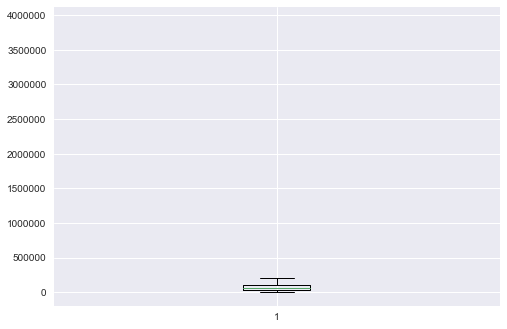

In [8]:
# checking for outliers in clientIncome using the boxplot
plt.boxplot(read_data['clientIncome'])
plt.show()

### preprocess clientAge

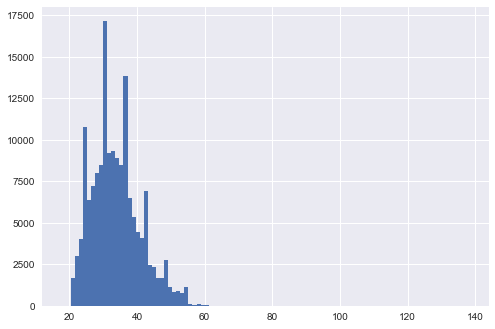

In [18]:
# checking for all unique clientAge Entry

new_dict = read_data['clientAge'].value_counts()
plt.hist(read_data['clientAge'], bins = 100)
plt.show()

### preprocesss incomeVerified column

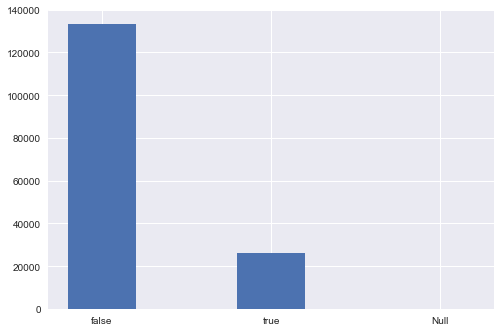

In [9]:
# checking the number of income verified to be true and false 
# by plotting on a bar chart using matplotlib library

income_verified = read_data['incomeVerified'].value_counts()

plt.bar(list(income_verified.keys()), list(income_verified.values), width = 0.4)
plt.show()

In [10]:
# Since we have 103 Null people whose incomeVerification status is unknown we will replace them with 'False'
# since we have more false than true
# we will also set all true to 1 and all false to 0

read_data['incomeVerified'][read_data['incomeVerified'] == 'true'] = 1
read_data['incomeVerified'][read_data['incomeVerified'] == 'false'] = 0
read_data['incomeVerified'][read_data['incomeVerified'] == 'Null'] = 0

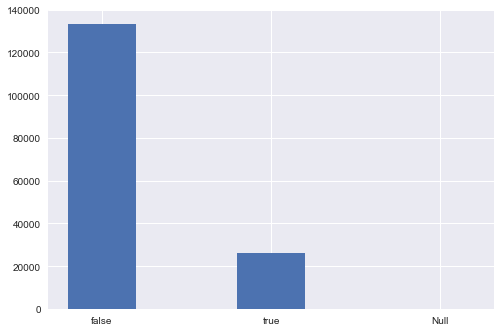

In [17]:
plt.bar(list(income_verified.keys()), list(income_verified.values), width = 0.4)
plt.show()

### preprocess loanType column

In [19]:
read_data['loanType'].unique()

array(['paylater'], dtype=object)

In [20]:
# since all loans are of type 'paylater', we can drop the loanType column
read_data = read_data.drop('loanType', axis = 1)

### preprocessing client Residential status 

In [21]:
dict_client_residence = read_data['clientResidentialStauts'].value_counts()

In [22]:
# setting the few 'Null' entries to 'Rented' since we have more rented entries
read_data['clientResidentialStauts'][read_data['clientResidentialStauts']== 'Null'] = 'Rented'

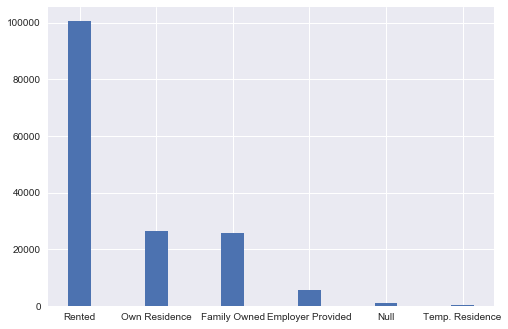

In [23]:
plt.bar(list(dict_client_residence.keys()), list(dict_client_residence.values), width = 0.3)
plt.show()

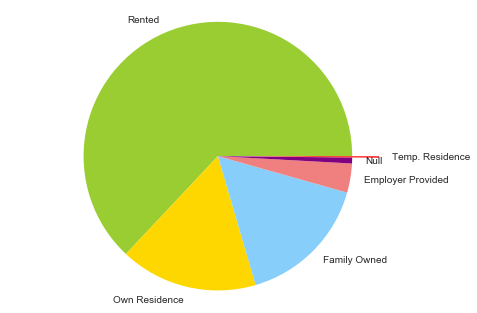

In [24]:
# The slices will be ordered and plotted counter-clockwise.
# Pie visualization of the client Residential Status
labels = list(dict_client_residence.keys())
sizes = list(dict_client_residence.values)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'purple','red']
explode = (0, 0, 0, 0,0,0.2) # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

### preprocess client states

In [25]:
client_state = read_data['clientState'].value_counts()

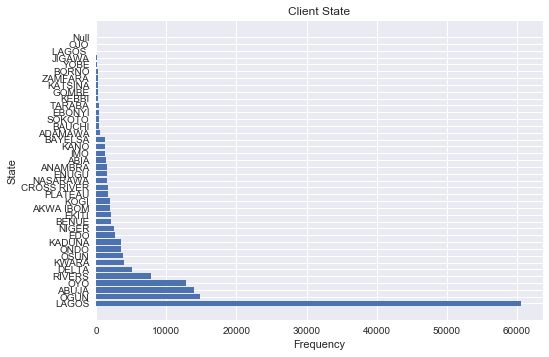

In [29]:
# setting all few 'Null' entries of 'clientState' column to 'LAGOS'
# since we have more Entries of LAGOS.

read_data['clientState'][read_data['clientState'] == 'Null'] = 'LAGOS'


plt.barh(list(client_state.keys()), list(client_state.values), orientation = 'horizontal')
plt.title('Client State')
plt.xlabel('Frequency')
plt.ylabel('State')
plt.show()

### preprocess client marital status

In [27]:
marital_status_dict = read_data['clientMaritalStatus'].value_counts()

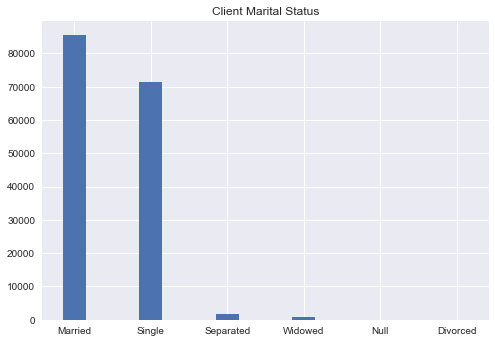

In [28]:
# plotting a bar chart to illustrate the number of each entries of the clientMaritalStatus column
plt.bar(list(marital_status_dict.keys()), list(marital_status_dict.values), width = 0.3)
plt.title('Client Marital Status')
plt.show()

In [30]:
# A simple function that plots a bar graph taking its input as a dictionary
def plot_bar(value, width = 0.2):
    val = value.value_counts()
    plt.bar(list(val.keys()), list(val.values), width = width)
    plt.show()
    return


In [32]:
# setting all Null entries in the clientMaritalStatus to 'Married' Since we 
# have more entries to be married

read_data['clientMaritalStatus'][read_data['clientMaritalStatus']== 'Null'] = 'Married'

### preprocess loan purpose

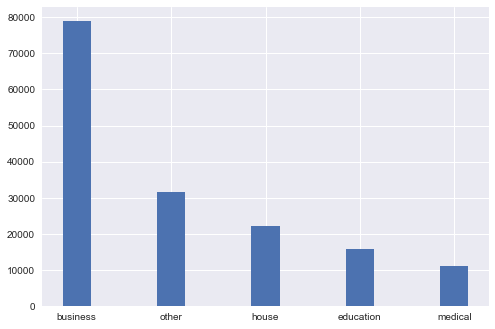

In [34]:
# plotting an histogram to illustrate client's loan purpose from the clientLoanPurpose column

plot_bar(read_data['clientLoanPurpose'], width = 0.3)

In [35]:
read_data['clientLoanPurpose'].value_counts()

business     78976
other        31554
house        22240
education    15737
medical      11089
Name: clientLoanPurpose, dtype: int64

## More visualizations

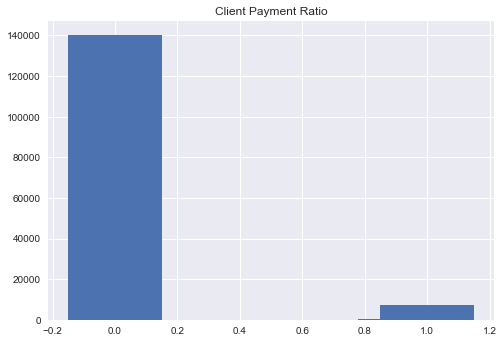

In [39]:
# An histogram chart showing the payment Ratio
plt.title('Client Payment Ratio')
plot_bar(read_data['paymentRatio'], width = 0.3)

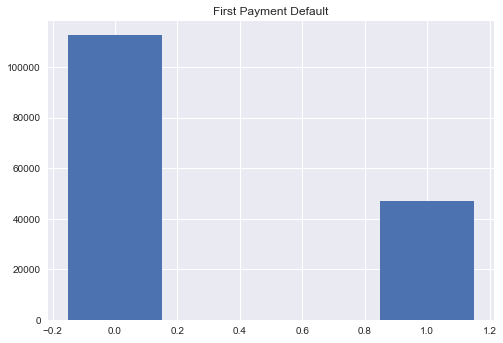

In [40]:
# An histogram chart showing the First Payment Default of clients
plt.title('First Payment Default')
plot_bar(read_data['FirstPaymentDefault'], width = 0.3)

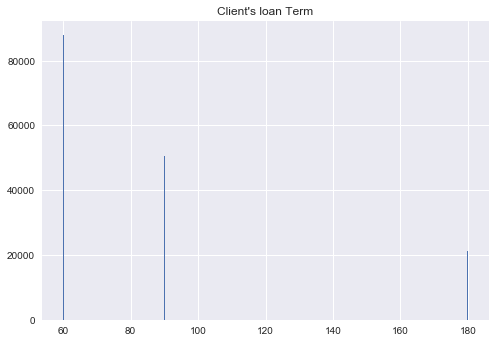

In [41]:
# visualization of various loanTerm
plt.title('Client\'s loan Term')
plot_bar(read_data['loanTerm'], width = 0.3)

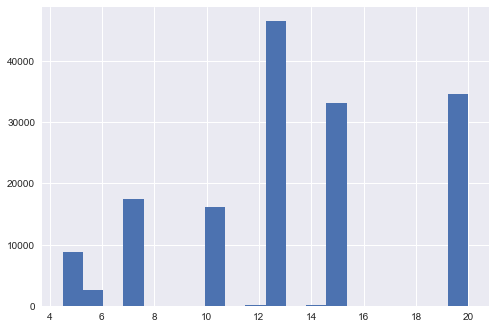

In [42]:
# visualiation of the various interest rate
plt.hist(read_data['interestRate'], bins = 20, histtype ='barstacked')
plt.show()

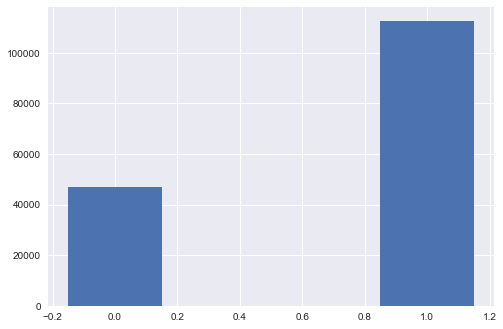

In [43]:
# max amount token
plot_bar(read_data['max_amount_taken'], width = 0.3)

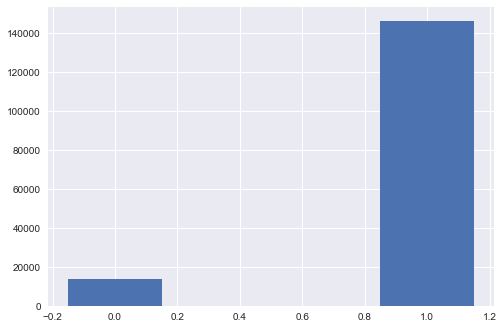

In [44]:
# max tenor amount
plot_bar(read_data['max_tenor_taken'], width = 0.3)

In [45]:
# checking for correlation amongst the data
check = read_data[['max_tenor_taken','max_amount_taken','FirstPaymentDefault', 'paymentRatio','incomeVerified']]
check.corr()

,max_tenor_taken,max_amount_taken,FirstPaymentDefault,paymentRatio
max_tenor_taken,1.000000,0.453959,0.090966,0.077976
max_amount_taken,0.453959,1.000000,0.115368,0.117923
FirstPaymentDefault,0.090966,0.115368,1.000000,0.545760
paymentRatio,0.077976,0.117923,0.545760,1.000000


## converting all categorical variables into numerics using the get dummies variable

In [46]:
# this includes columns like'clientGender', 'clientState', 'clientMaritalStatus','clientLoanPurpose', 'clientResidentialStauts'

data = pd.get_dummies(read_data,prefix_sep = '_', columns = ['clientGender', 'clientState', 'clientMaritalStatus',
                                         'clientLoanPurpose', 'clientResidentialStauts'])

In [47]:
data.head(3)

,clientId,clientIncome,incomeVerified,clientAge,clientTimeAtEmployer,clientNumberPhoneContacts,clientAvgCallsPerDay,loanNumber,applicationDate,approvalDate,...,clientLoanPurpose_business,clientLoanPurpose_education,clientLoanPurpose_house,clientLoanPurpose_medical,clientLoanPurpose_other,clientResidentialStauts_Employer Provided,clientResidentialStauts_Family Owned,clientResidentialStauts_Own Residence,clientResidentialStauts_Rented,clientResidentialStauts_Temp. Residence
0,719046128,25000.00,1,38,36+,2976,51.40909090909091,4,2018-03-18,2018-03-18,...,1,0,0,0,0,0,0,0,1,0
1,821565030,105000.00,0,31,36+,1159,121.03645833333333,4,2018-01-06,2018-01-06,...,0,0,1,0,0,0,0,0,1,0
2,703822576,78029.19,1,38,36+,1375,13.402912621359222,4,2018-04-27,2018-04-27,...,0,1,0,0,0,0,1,0,0,0


### dropping all date related columns, clientId, clientNumberPhoneContacts

In [48]:
data = data.drop(['applicationDate', 'approvalDate', 'declinedDate',
       'disbursementDate', 'payout_status', 'dueDate', 'paidAt'], axis = 1)

In [50]:
x = data.drop(['clientId', 'clientNumberPhoneContacts'], axis = 1)

### checking for columns with null or string relate types

In [51]:
for k in x.columns:
    value = sum([isinstance(i, str) for i in x[k]])
    if value > 1:
        print(k, value)
    else:
        pass

clientTimeAtEmployer 159596
clientAvgCallsPerDay 159596


In [53]:
# dropping the clientTimeAtEmployer and ClientAvgCallsPerDay column
x = x.drop(['clientTimeAtEmployer', 'clientAvgCallsPerDay'], axis = 1)

In [54]:
'loanDefault' in x.columns

True

In [55]:
# extracting the target value ('loanDefault') from the data as y 
# Having the rest of the data as x
target = x['loanDefault']
x = x.drop('loanDefault', axis = 1)
target.shape

(159596,)

In [56]:
# applying various scaling metrics, Normalization to the x and y data before
# model building

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

min_max = MinMaxScaler()
std = StandardScaler()
norm = Normalizer()

x_new = min_max.fit_transform(x)
x_std = std.fit_transform(x_new)
x_norm = std.fit_transform(x_std)

In [57]:
# splitting the x and y scaled data into train and test categories
# using the train_test_split provided in scikit-learn

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm, target, test_size = 0.4, random_state = 42)



# extracting each train and test into CSV file for Neural Network
x_train_dataframe = pd.DataFrame(x_train)
x_test_dataframe = pd.DataFrame(x_test)
y_train_dataframe = pd.DataFrame(y_train)
y_test_dataframe = pd.DataFrame(y_test)


x_train_dataframe.to_csv('x_train_nn.csv')
x_test_dataframe.to_csv('x_test_nn.csv')
y_train_dataframe.to_csv('y_train_nn.csv')
y_test_dataframe.to_csv('y_test_nn.csv')

# feature selection

In [58]:
# selecting the best number of features for our random forest classifier algorithm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func =chi2, k = 4)
fit = test.fit(x,target)

In [59]:
# summarize scores
np.set_printoptions(precision = 3)
print(fit.scores_)

[  2.060e+07   3.275e+02   5.687e+02   1.774e+03   1.050e+06   1.497e+03
   2.434e+02   4.778e+02   1.465e+02   4.024e+04   4.386e+04   7.575e+01
   3.449e+01   1.218e-02   8.140e+01   1.773e+00   1.658e+00   5.117e+00
   2.669e+00   9.298e+00   9.388e+00   2.259e+00   2.538e-01   2.758e+00
   4.705e+00   4.986e-01   5.502e+01   1.777e+00   5.008e-01   3.192e+00
   1.829e+00   9.236e-01   1.051e+01   1.838e+00   8.678e+00   6.232e+01
   6.619e+01   1.533e+02   3.887e-01   8.600e-02   1.393e+02   1.625e+01
   2.573e+00   2.665e+01   6.814e+01   1.203e+02   3.348e+00   1.188e+00
   3.912e-01   1.611e-02   2.976e-01   7.739e-02   4.251e-02   3.736e+01
   3.664e+00   5.172e+01   2.998e+00   4.299e+02   4.079e+01   2.212e+02
   1.163e+01   3.178e+02   6.109e+01   1.793e+00   1.464e+01   2.981e-01
   3.633e-02]


In [68]:
#  using the ExtraTreesClassifier as an esemble to determine the feature importance
# of each features
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x_norm, target)
print(model.feature_importances_)

[  1.064e-01   6.703e-03   1.214e-01   5.409e-02   6.673e-02   2.110e-02
   1.010e-02   9.576e-03   7.635e-03   1.855e-01   2.775e-01   2.969e-03
   3.154e-03   1.745e-03   4.296e-03   9.735e-04   1.924e-03   1.669e-03
   6.896e-04   1.341e-03   2.097e-03   3.893e-04   1.713e-03   3.315e-03
   7.366e-04   2.586e-03   1.991e-03   1.750e-03   4.670e-04   1.425e-03
   1.104e-04   2.919e-03   1.406e-03   4.541e-04   4.581e-04   1.769e-03
   3.077e-03   5.793e-03   3.097e-07   1.911e-03   1.917e-03   5.113e-03
   1.991e-05   2.870e-03   2.639e-03   4.009e-03   1.824e-03   4.045e-03
   6.662e-04   6.074e-04   2.310e-04   4.393e-04   2.049e-05   4.436e-03
   1.280e-03   4.698e-03   8.078e-04   5.269e-03   4.178e-03   3.543e-03
   3.513e-03   4.013e-03   3.128e-03   6.383e-03   6.004e-03   8.114e-03
   3.746e-04]


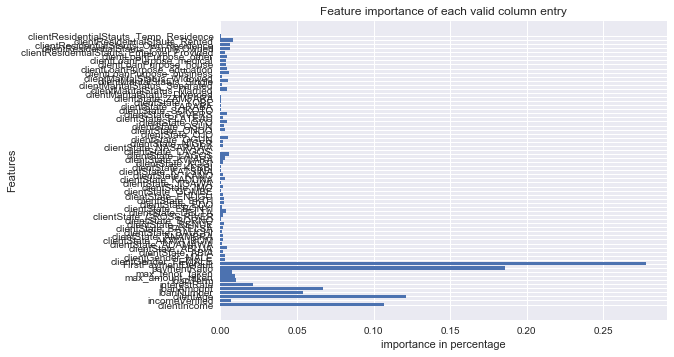

In [69]:
# visualization of each features and their relative importance 
plt.barh(x.columns, model.feature_importances_, orientation = 'horizontal')
plt.title('Feature importance of each valid column entry')
plt.xlabel('importance in percentage')
plt.ylabel('Features')
plt.show()
plt.show()

In [70]:
# selecting features with importance greater than 0.01
features = []
for i, j in zip(x.columns, model.feature_importances_):
    if j >= 0.01:
        features.append(i)
    else:
        pass
features

['clientIncome',
 'clientAge',
 'loanNumber',
 'loanAmount',
 'interestRate',
 'loanTerm',
 'paymentRatio',
 'FirstPaymentDefault']

In [73]:
x_norm  = pd.DataFrame(x_norm, columns = x.columns)

In [74]:
# extracting the features into a new dataframe called random_forest_data
random_forest_data = x_norm[features]

In [79]:
# feature extraction of 8 best features using logisticRegression as the algorithm
# alongside RFE from the feature_selection module

from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 8)
fit = rfe.fit(x_norm, target)
print('Num Features: %d' % fit.n_features_)
print('Selected Features: %s' % fit.support_)
print('Feature Ranking: %s' % fit.ranking_)

Num Features: 8
Selected Features: [ True  True False  True False  True  True False  True  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False]
Feature Ranking: [ 1  1  5  1 35  1  1 34  1  1  1  4 11 18 48 53 26 40 32 17 51 49 25 57 46
 31 33 20 42 38 27 60 41 19 14 36 24  6 12 52 13 55  7 21 39 15 30 56 28 54
 59 37 47 44 43 10 50 22 23  3 16  2 29 45  8  9 58]


In [80]:
important_features = []
for i, j in zip(fit.support_, x.columns):
    if i == True:
        important_features.append(j)
    else:
        pass

In [81]:
important_features

['clientIncome',
 'incomeVerified',
 'loanNumber',
 'interestRate',
 'loanTerm',
 'max_tenor_taken',
 'paymentRatio',
 'FirstPaymentDefault']

In [93]:
new_feature = x[important_features]

min_max = MinMaxScaler()
std = StandardScaler()
norm = Normalizer()

x_new = min_max.fit_transform(new_feature)
x_std = std.fit_transform(x_new)
x_feature = std.fit_transform(x_std)

In [94]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_feature, target, test_size = 0.4, random_state = 42)


In [95]:
# converting the train and test files into a dataframe

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)



# Random Forest Classifier Analytics

In [96]:
# checking for correlation among each feature
x_train.corr()

,0,1,2,3,4,5,6,7
0,1.000000,0.104102,-0.007036,-0.129086,0.071929,-0.068010,-0.017961,-0.045924
1,0.104102,1.000000,-0.032794,-0.421971,0.384811,-0.323723,-0.085293,-0.106760
2,-0.007036,-0.032794,1.000000,-0.303700,0.252670,-0.159704,-0.083861,-0.059474
3,-0.129086,-0.421971,-0.303700,1.000000,-0.740341,0.150468,0.110664,0.127514
4,0.071929,0.384811,0.252670,-0.740341,1.000000,0.089911,-0.059436,-0.063209
5,-0.068010,-0.323723,-0.159704,0.150468,0.089911,1.000000,0.075978,0.091474
6,-0.017961,-0.085293,-0.083861,0.110664,-0.059436,0.075978,1.000000,0.544294
7,-0.045924,-0.106760,-0.059474,0.127514,-0.063209,0.091474,0.544294,1.000000


## Building a logistic regression model

In [109]:
# building a logistic regression model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

log.fit(x_train, y_train)
log.score(x_train, y_train)

0.84912852324112076

In [110]:
prediction = log.predict(x_test)
from sklearn.metrics import accuracy_score
test_score = accuracy_score(prediction, y_test)
test_score

0.85295822302980939

## Building a decision Tree model

In [99]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [100]:
train_score = tree.score(x_train, y_train)
prediction = tree.predict(x_test)
from sklearn.metrics import accuracy_score
test_score = accuracy_score(prediction, y_test)
train_score, test_score

(0.88110529778501834, 0.84088096618054797)

## Building a random Forest model

In [111]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [112]:
forest.score(x_train, y_train)

0.87567488538696914

In [113]:
prediction = forest.predict(x_test)
from sklearn.metrics import accuracy_score
test_score = accuracy_score(prediction, y_test)
test_score

0.84105327464402635

In [115]:
# The accuracy_score, precision_score, recall_score and f1_score of random_forest
# classifier on y_test and prediction
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, prediction)
print('Test Accuracy: %f' % (accuracy*100))
# precision tp / (tp + fp)
precision = precision_score(y_test, prediction)
print('Test Precision: %f' % (precision*100))
# recall: tp / (tp + fn)
recall = recall_score(y_test, prediction)
print('Test Recall: %f' % (recall*100))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, prediction)
print('Test F1 score: %f' % (f1*100))

Test Accuracy: 84.105327
Test Precision: 75.146313
Test Recall: 64.627258
Test F1 score: 69.490965


### checking for optimal n_estimators for the random forest model

In [104]:
for i in [100,150,200,250]:
    tree = RandomForestClassifier(random_state = 0, n_estimators = i)
    tree.fit(x_train, y_train)
    train_score = tree.score(x_train, y_train)
    prediction = log.predict(x_test)
    from sklearn.metrics import accuracy_score
    test_score = accuracy_score(prediction, y_test)
    print(train_score, test_score)

0.881073968483 0.85295822303
0.881094854684 0.85295822303
0.881105297785 0.85295822303
0.881105297785 0.85295822303


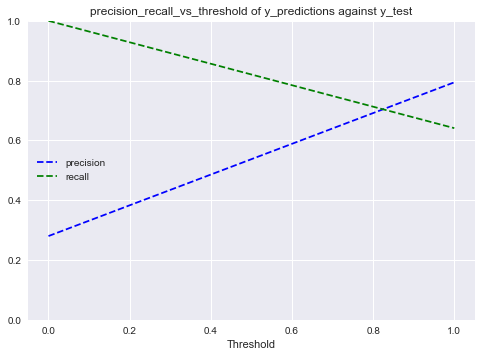

In [105]:
# Precison Recall curve of forest prediction against y_test

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, prediction)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.title('precision_recall_vs_threshold of y_predictions against y_test')
    plt.legend(loc = 'center left')
    plt.ylim([0,1])
    plt.show()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

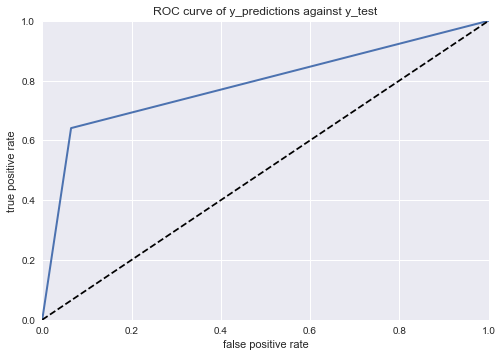

In [106]:
# Roc_curve of forest prediction against y_test

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, prediction)

def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth= 2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('ROC curve of y_predictions against y_test')
plot_roc_curve(fpr, tpr, thresholds)
plt.show()

In [107]:
# ROC score of y_test against y_train

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, prediction)

0.78821744951651596

### optimal N_estimator for random forest

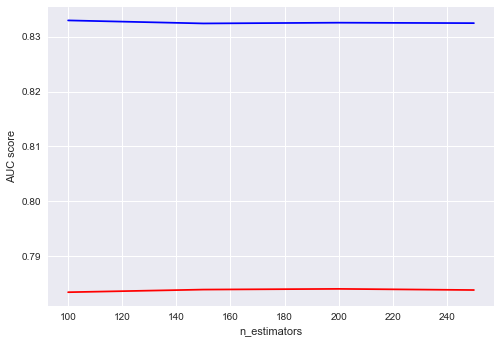

In [116]:
from sklearn.metrics import roc_curve, auc

n_estimators = [100,150,200,250]
train_results = []
test_results = []

for estimator in n_estimators:
    forest = RandomForestClassifier(n_estimators = estimator, n_jobs =-1)
    forest.fit(x_train, y_train)
    
    
    train_pred = forest.predict(x_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = forest.predict(x_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D

line1 = plt.plot(n_estimators, train_results, 'b', label = 'Train AUC')
line2 = plt.plot(n_estimators, test_results, 'r', label = 'Test AUC')

#plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})

plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [118]:
forest = RandomForestClassifier(n_estimators = 200, random_state = 2)
forest.fit(x_train, y_train)
train_score  = forest.score(x_train, y_train)
print ('Train accuracy:',train_score)

accuracy = accuracy_score(y_test, prediction)
print('Test Accuracy: %f' % (accuracy*100))
# precision tp / (tp + fp)
precision = precision_score(y_test, prediction)
print('Test Precision: %f' % (precision*100))
# recall: tp / (tp + fn)
recall = recall_score(y_test, prediction)
print('Test Recall: %f' % (recall*100))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, prediction)
print('Test F1 score: %f' % (f1*100))

Train accuracy: 0.881105297785
Test Accuracy: 84.105327
Test Precision: 75.146313
Test Recall: 64.627258
Test F1 score: 69.490965


## Max_depth parameter hypertuning

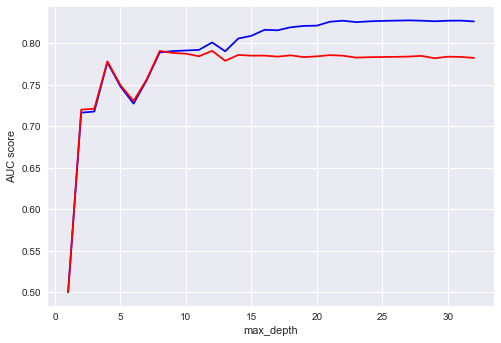

In [119]:
max_depths = np.linspace(1,32,32, endpoint = True)
train_results = []
test_results = []

for max_depth in max_depths:
    forest = RandomForestClassifier(max_depth = max_depth, n_jobs =-1)
    forest.fit(x_train, y_train)
    
    
    train_pred = forest.predict(x_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = forest.predict(x_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D

line1 = plt.plot(max_depths, train_results, 'b', label = 'Train AUC')
line2 = plt.plot(max_depths, test_results, 'r', label = 'Test AUC')

#plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})

plt.ylabel('AUC score')
plt.xlabel('max_depth')
plt.show()

In [120]:
forest = RandomForestClassifier(n_estimators = 200, random_state = 2, max_depth =30)
forest.fit(x_train, y_train)
train_score  = forest.score(x_train, y_train)
print ('Train accuracy:',train_score)

accuracy = accuracy_score(y_test, prediction)
print('Test Accuracy: %f' % (accuracy*100))
# precision tp / (tp + fp)
precision = precision_score(y_test, prediction)
print('Test Precision: %f' % (precision*100))
# recall: tp / (tp + fn)
recall = recall_score(y_test, prediction)
print('Test Recall: %f' % (recall*100))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, prediction)
print('Test F1 score: %f' % (f1*100))

Train accuracy: 0.881105297785
Test Accuracy: 84.105327
Test Precision: 75.146313
Test Recall: 64.627258
Test F1 score: 69.490965


## min_samples_split

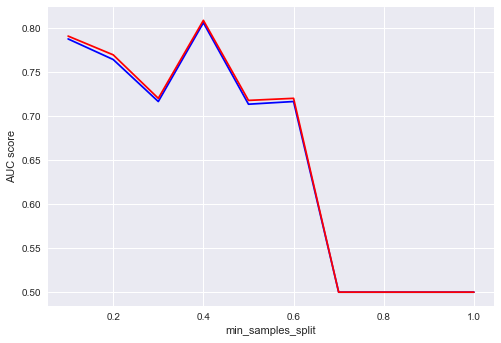

In [121]:
min_samples_splits = np.linspace(0.1, 1.0,10,endpoint = True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    forest = RandomForestClassifier(min_samples_split = min_samples_split,n_jobs =-1)
    forest.fit(x_train, y_train)
    
    
    train_pred = forest.predict(x_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = forest.predict(x_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D

line1 = plt.plot(min_samples_splits, train_results, 'b', label = 'Train AUC')
line2 = plt.plot(min_samples_splits, test_results, 'r', label = 'Test AUC')

#plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})

plt.ylabel('AUC score')
plt.xlabel('min_samples_split')
plt.show()

In [122]:
forest = RandomForestClassifier(n_estimators = 200, 
                                min_samples_split = 0.4,
                                random_state = 2, max_depth =30)
forest.fit(x_train, y_train)
train_score  = forest.score(x_train, y_train)
print ('Train accuracy:',train_score)

accuracy = accuracy_score(y_test, prediction)
print('Test Accuracy: %f' % (accuracy*100))
# precision tp / (tp + fp)
precision = precision_score(y_test, prediction)
print('Test Precision: %f' % (precision*100))
# recall: tp / (tp + fn)
recall = recall_score(y_test, prediction)
print('Test Recall: %f' % (recall*100))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, prediction)
print('Test F1 score: %f' % (f1*100))

Train accuracy: 0.841358856272
Test Accuracy: 84.105327
Test Precision: 75.146313
Test Recall: 64.627258
Test F1 score: 69.490965


## min samples leaf

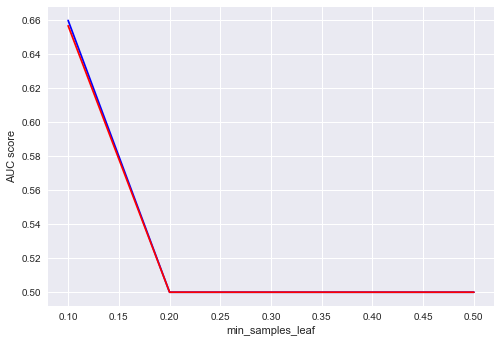

In [123]:
min_samples_leafs = np.linspace(0.1, 0.5,5,endpoint = True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    forest = RandomForestClassifier(min_samples_leaf = min_samples_leaf,
                                    n_jobs =-1)
    forest.fit(x_train, y_train)
    
    
    train_pred = forest.predict(x_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = forest.predict(x_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D

line1 = plt.plot(min_samples_leafs, train_results, 'b', label = 'Train AUC')
line2 = plt.plot(min_samples_leafs, test_results, 'r', label = 'Test AUC')

#plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})

plt.ylabel('AUC score')
plt.xlabel('min_samples_leaf')
plt.show()

In [127]:
forest = RandomForestClassifier(n_estimators = 200, 
                                min_samples_split = 0.4, min_samples_leaf = 0.10,
                                random_state = 2, max_depth =30)
forest.fit(x_train, y_train)
train_score  = forest.score(x_train, y_train)
print ('Train accuracy:',train_score)

accuracy = accuracy_score(y_test, prediction)
print('Test Accuracy: %f' % (accuracy*100))
# precision tp / (tp + fp)
precision = precision_score(y_test, prediction)
print('Test Precision: %f' % (precision*100))
# recall: tp / (tp + fn)
recall = recall_score(y_test, prediction)
print('Test Recall: %f' % (recall*100))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, prediction)
print('Test F1 score: %f' % (f1*100))

Train accuracy: 0.720239773594
Test Accuracy: 84.105327
Test Precision: 75.146313
Test Recall: 64.627258
Test F1 score: 69.490965


## max_features

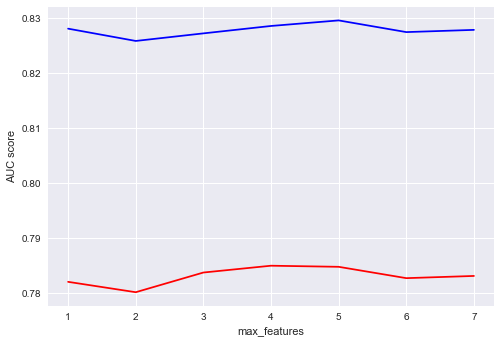

In [128]:
max_features = list(range(1,x_train.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
    forest = RandomForestClassifier(max_features = max_feature,
                                    n_jobs =-1)
    forest.fit(x_train, y_train)
    
    
    train_pred = forest.predict(x_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = forest.predict(x_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D

line1 = plt.plot(max_features, train_results, 'b', label = 'Train AUC')
line2 = plt.plot(max_features, test_results, 'r', label = 'Test AUC')

#plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})

plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.show()

In [130]:
forest = RandomForestClassifier(n_estimators = 200, 
                                min_samples_split = 0.4, min_samples_leaf = 0.10,
                                random_state = 2, max_depth =30,max_features = 5)
forest.fit(x_train, y_train)
train_score  = forest.score(x_train, y_train)
print ('Train accuracy:',(train_score* 100))

accuracy = accuracy_score(y_test, prediction)
print('Test Accuracy: %f' % (accuracy*100))
# precision tp / (tp + fp)
precision = precision_score(y_test, prediction)
print('Test Precision: %f' % (precision*100))
# recall: tp / (tp + fn)
recall = recall_score(y_test, prediction)
print('Test Recall: %f' % (recall*100))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, prediction)
print('Test F1 score: %f' % (f1*100))

Train accuracy: 84.502438464
Test Accuracy: 84.105327
Test Precision: 75.146313
Test Recall: 64.627258
Test F1 score: 69.490965


# Deep learning solution /Analysis

## using keras Approach

#### Input dimension of input layer is 67

#### Using relu as the activation for all hidden layers and softmax as the activation function for all output layers.

### Keras Model One

In [131]:
# using x_train_nn, y_train_nn, x_test_nn, y_test_nn as my input data
# with column 67 as features and the y as target value


import keras
import tensorflow as tf

from keras import Sequential
from keras.layers import Dense

from keras.regularizers import l2 # using L2 as the regularizer

model_one = Sequential()
# layer 1 300 neurons
model_one.add(Dense(300, input_dim = 67, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation = 'relu'))

# layer 2 500 neurons
# with relu as an activation function
model_one.add(Dense(500, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation = 'relu'))

# layer 3 100 neurons
model_one.add(Dense(100, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation = 'relu'))
model_one.add(Dense(1,activation = 'sigmoid'))


Using TensorFlow backend.


In [134]:
# compile model
model_one.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model_one.fit(x_train_dataframe, y_train_dataframe, epochs = 20, steps_per_epoch = 10)

Epoch 1/20
10/10 [==============================] - 27s 3s/step - loss: 6.2968 - acc: 0.7665
Epoch 2/20
10/10 [==============================] - 26s 3s/step - loss: 4.6559 - acc: 0.8416
Epoch 3/20
10/10 [==============================] - 26s 3s/step - loss: 3.4165 - acc: 0.8477
Epoch 4/20
10/10 [==============================] - 26s 3s/step - loss: 2.4921 - acc: 0.8496
Epoch 5/20
10/10 [==============================] - 25s 2s/step - loss: 1.8286 - acc: 0.8502
Epoch 6/20
10/10 [==============================] - 25s 3s/step - loss: 1.3638 - acc: 0.8502
Epoch 7/20
10/10 [==============================] - 26s 3s/step - loss: 1.0440 - acc: 0.8508
Epoch 8/20
10/10 [==============================] - 25s 3s/step - loss: 0.8271 - acc: 0.8509
Epoch 9/20
10/10 [==============================] - 25s 3s/step - loss: 0.6814 - acc: 0.8511
Epoch 10/20
10/10 [==============================] - 25s 3s/step - loss: 0.5844 - acc: 0.8513
Epoch 11/20
10/10 [==============================] - 25s 3s/step - lo

In [135]:
x_train = x_train_dataframe
y_train = y_train_dataframe
x_test = x_test_dataframe
y_test = y_test_dataframe

# evaluate the model
scores = model_one.evaluate(x_train, y_train)

print('train_'+'%s: %.2f%%' % (model_one.metrics_names[1], scores[1]*100))
prediction = model_one.predict(x_test).round()

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, prediction)
print('Test Accuracy: %f' % (accuracy*100))
# precision tp / (tp + fp)
precision = precision_score(y_test, prediction)
print('Test Precision: %f' % (precision*100))
# recall: tp / (tp + fn)
recall = recall_score(y_test, prediction)
print('Test Recall: %f' % (recall*100))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, prediction)
print('Test F1 score: %f' % (f1*100))

95757/95757 [==============================] - 5s 56us/step
train_acc: 85.15%
Test Accuracy: 85.226899
Test Precision: 76.482387
Test Recall: 68.240031
Test F1 score: 72.126496


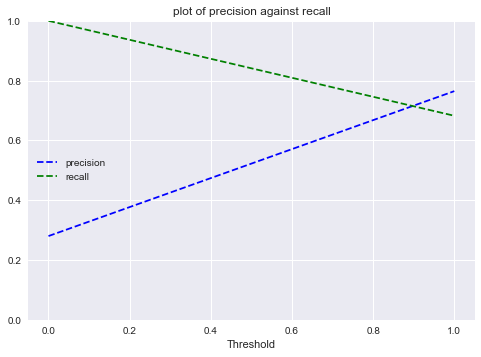

In [136]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, prediction)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc = 'center left')
    plt.title('plot of precision against recall')
    plt.ylim([0,1])
    plt.show()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

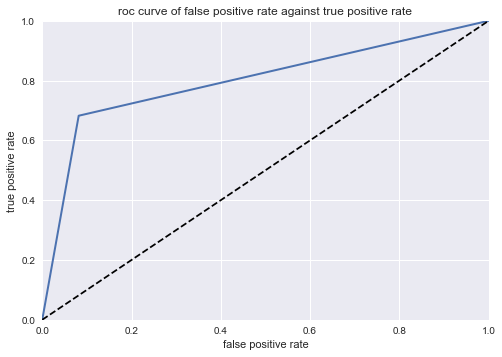

In [137]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, prediction)

def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth= 2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('roc curve of false positive rate against true positive rate')
plot_roc_curve(fpr, tpr, thresholds)
plt.show()

## Model 2

In [141]:
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.optimizers import SGD


model = Sequential()
model.add(Dropout(0.2, input_shape=(67,)))
model.add(Dense(300, input_dim = 67, activation = 'relu')) 
model.add(Dropout(0.2))
model.add(Dense(500, activation = 'relu',kernel_initializer='normal',kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2))
model.add(Dense(100, activation = 'relu',kernel_initializer='normal',kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid',kernel_initializer='normal',kernel_constraint=maxnorm(3)))

sgd = SGD(lr=0.01, momentum=0.8, decay=0.0, nesterov=False)

In [142]:
model.compile(loss = 'binary_crossentropy', optimizer = sgd, metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 20, steps_per_epoch = 10)

Epoch 1/20
10/10 [==============================] - 38s 4s/step - loss: 0.6461 - acc: 0.7131
Epoch 2/20
10/10 [==============================] - 37s 4s/step - loss: 0.6165 - acc: 0.7202
Epoch 3/20
10/10 [==============================] - 37s 4s/step - loss: 0.6053 - acc: 0.7202
Epoch 4/20
10/10 [==============================] - 37s 4s/step - loss: 0.5977 - acc: 0.7202
Epoch 5/20
10/10 [==============================] - 38s 4s/step - loss: 0.5899 - acc: 0.7202
Epoch 6/20
10/10 [==============================] - 38s 4s/step - loss: 0.5827 - acc: 0.7202
Epoch 7/20
10/10 [==============================] - 38s 4s/step - loss: 0.5745 - acc: 0.7203
Epoch 8/20
10/10 [==============================] - 37s 4s/step - loss: 0.5665 - acc: 0.7207
Epoch 9/20
10/10 [==============================] - 39s 4s/step - loss: 0.5570 - acc: 0.7235
Epoch 10/20
10/10 [==============================] - 36s 4s/step - loss: 0.5466 - acc: 0.7323
Epoch 11/20
10/10 [==============================] - 36s 4s/step - lo

## Neural Network using scikit learn


In [143]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver = 'lbfgs', activation = 'relu', random_state = 0).fit(x_train, y_train)
train =mlp.score(x_train, y_train)
prediction = mlp.predict(x_test).round()

print('Train accuracy: ', (train*100))

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, prediction)
print('Test Accuracy: %f' % (accuracy*100))
# precision tp / (tp + fp)
precision = precision_score(y_test, prediction)
print('Test Precision: %f' % (precision*100))
# recall: tp / (tp + fn)
recall = recall_score(y_test, prediction)
print('Test Recall: %f' % (recall*100))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, prediction)
print('Test F1 score: %f' % (f1*100))
#test_score = accuracy_score(prediction.round(), y_test)
#scores[1]*100, test_score*100

Train accuracy:  87.0495107407
Test Accuracy: 84.485973
Test Precision: 78.438503
Test Recall: 61.523405
Test F1 score: 68.958817


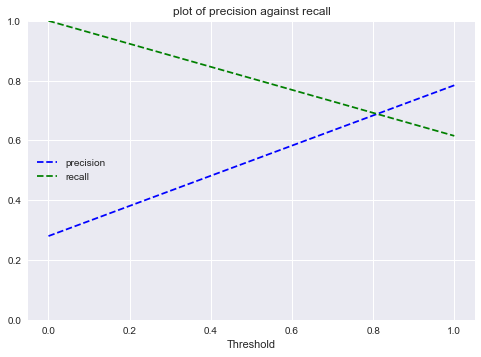

In [144]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, prediction)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc = 'center left')
    plt.title('plot of precision against recall')
    plt.ylim([0,1])
    plt.show()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

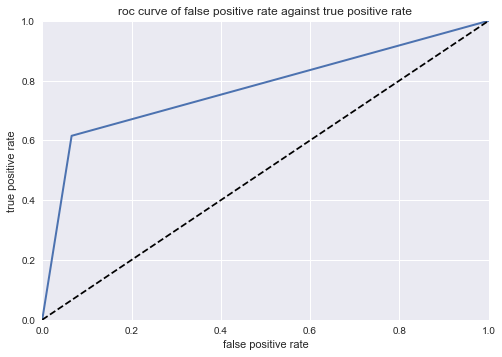

In [145]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, prediction)

def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth= 2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('roc curve of false positive rate against true positive rate')
plot_roc_curve(fpr, tpr, thresholds)
plt.show()

### using MLP classifiers while activation function is set to 'logistic regression'

In [146]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver = 'lbfgs', activation = 'logistic', random_state = 0).fit(x_train, y_train)
train =mlp.score(x_train, y_train)
prediction = mlp.predict(x_test)


print('Train accuracy: ', (train*100))

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, prediction)
print('Test Accuracy: %f' % (accuracy*100))
# precision tp / (tp + fp)
precision = precision_score(y_test, prediction)
print('Test Precision: %f' % (precision*100))
# recall: tp / (tp + fn)
recall = recall_score(y_test, prediction)
print('Test Recall: %f' % (recall*100))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, prediction)
print('Test F1 score: %f' % (f1*100))
#test_score = accuracy_score(prediction.round(), y_test)
#scores[1]*100, test_score*100

Train accuracy:  86.4866276095
Test Accuracy: 84.637917
Test Precision: 79.228207
Test Recall: 61.199038
Test F1 score: 69.056258


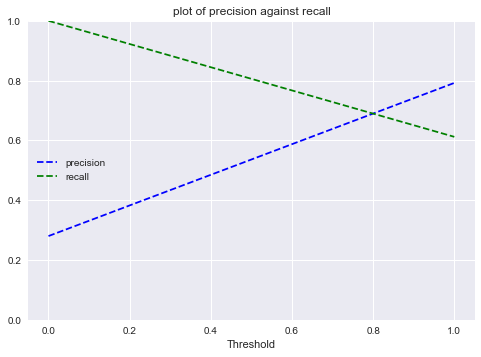

In [147]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, prediction)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc = 'center left')
    plt.title('plot of precision against recall')
    plt.ylim([0,1])
    plt.show()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

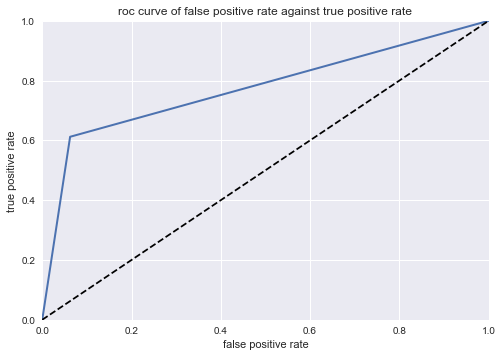

In [148]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, prediction)

def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth= 2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('roc curve of false positive rate against true positive rate')
plot_roc_curve(fpr, tpr, thresholds)
plt.show()

# I would prefer to deploy my neural network (KERAS MODEL ONE) than to deploy the randomforest model
# because, the precision, recall and f1_score determines the accuracy of the model
# thou, the accuracy of the model for both train and test of the random forest is 84.1 and 84.5 percent
# that of the Neural Network is 85.15 and 85.22 train and test respectively.
# since the precision, recall and f1_score of my Neural network is higher than
# the precision, recall and f1_score of my random forest model
# I would prefer to deploy my Neural Network Model